/var/folders/t_/91rqdbn53njdsvsqb1hgqdw80000gn/T/ipykernel_18018/2656831461.py:121: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(flops), acc, linestyle,
/var/folders/t_/91rqdbn53njdsvsqb1hgqdw80000gn/T/ipykernel_18018/2656831461.py:129: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(flops), acc, linestyle,


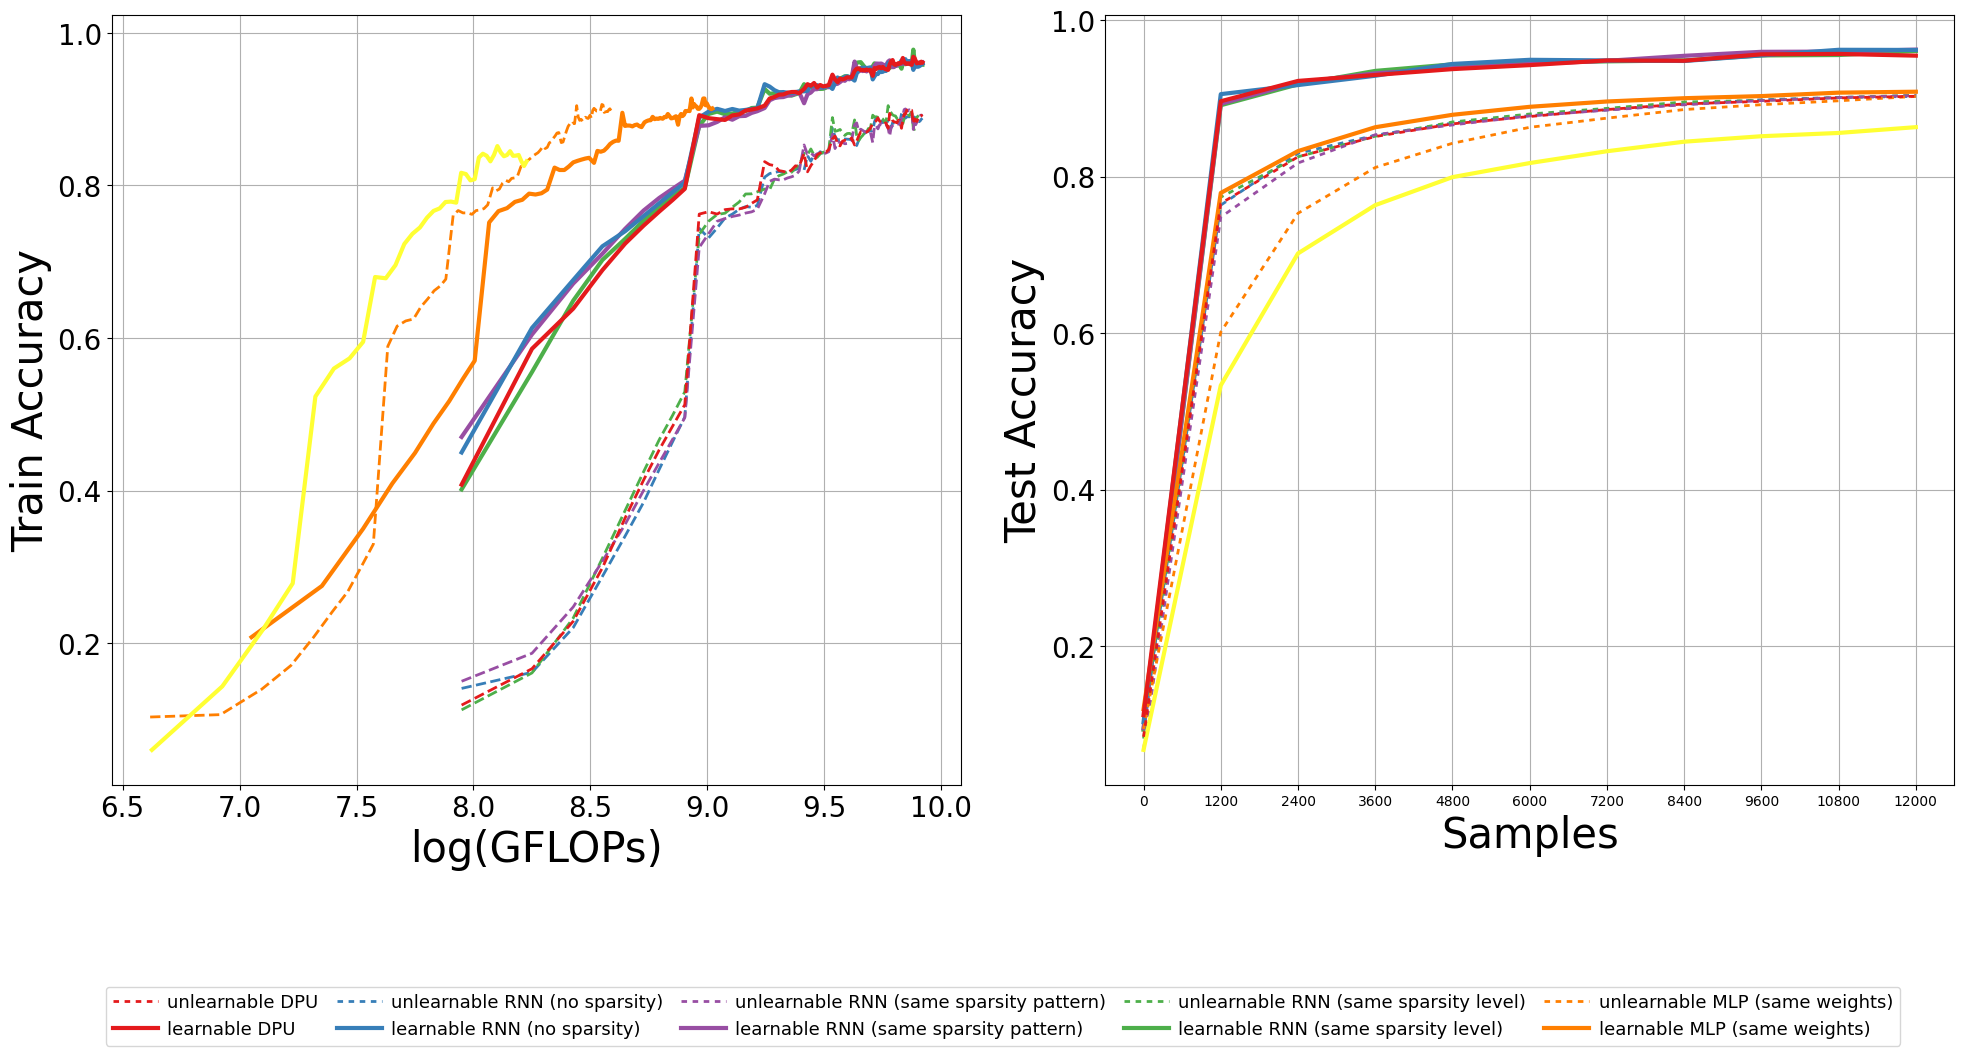

In [38]:
# File: plot_metrics.ipynb
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

signed = True
fewshot = True
sample = False


# 定义实验顺序
experiment_order = [
    "Static_BaseRNN", "Hungarian_DrosoInit_DrosoRef", "Hungarian_RandInit_RandSparseRef", "Hungarian_RandInit_RandStructureRef",
    "Learnable_BaseRNN", "Static_BaseRNN_random", "Static_BaseRNN_RandSparse", "Static_BaseRNN_RandStructure",
    "Twohidden_MLP","Static_MLP","Single_MLP"
]

def plot_results():
    # 加载结果
    results = {}
    for name in experiment_order:
        base_name = name
        if fewshot:
            base_name += "_fewshot"
        if signed:
            base_name += ".signed"
        if sample:
            base_name += ".sample"
        fname = f"{base_name}.pkl"
        try:
            results[name] = pickle.load(open(fname, "rb"))
        except FileNotFoundError:
            print(f"Warning: Result file {fname} not found, skipping...")
  
    # 创建画布
    fig = plt.figure(figsize=(20, 16))
  
    # 设置颜色方案
    colors = sns.color_palette('Set1', n_colors=10)
    
    # 类型对应的颜色
    type_colors = {
        'DPU': colors[0],    # Static_BaseRNN, Hungarian_RandInit_DrosoRef
        'RNN': colors[1],    # RNN no sparsty
        'RNN_sl':colors[2],  # RNN same sparsty level
        'RNN_sp':colors[3],  # RNN same sparsty pattern
        'MLP': colors[4],     # Static_MLP, Twohidden_MLP
        'Single_MLP': colors[5]     # Single_MLP
    }
    
    # 自定义标签
    labelname = {
        "Static_BaseRNN": "unlearnable DPU",
        "Hungarian_DrosoInit_DrosoRef": "learnable DPU",
        "Hungarian_RandInit_RandSparseRef": "learnable RNN (same sparsity level)",
        "Hungarian_RandInit_RandStructureRef": "learnable RNN (same sparsity pattern)",
        "Learnable_BaseRNN": "learnable RNN (no sparsity)",
        "Static_BaseRNN_random": "unlearnable RNN (no sparsity)",
        "Static_BaseRNN_RandSparse": "unlearnable RNN (same sparsity level)",
        "Static_BaseRNN_RandStructure": "unlearnable RNN (same sparsity pattern)",
        "Twohidden_MLP": "learnable MLP (same weights)",
        "Static_MLP": "unlearnable MLP (same weights)",
        "Single_MLP": "learnable MLP (single hidden layer)"
    }
    
    # 类型映射
    type_map = {
        "Static_BaseRNN": "DPU",
        "Hungarian_DrosoInit_DrosoRef": "DPU",
        "Hungarian_RandInit_RandSparseRef": "RNN_sl",
        "Hungarian_RandInit_RandStructureRef": "RNN_sp",
        "Learnable_BaseRNN": "RNN",
        "Static_BaseRNN_random": "RNN",
        "Static_BaseRNN_RandSparse": "RNN_sl",
        "Static_BaseRNN_RandStructure": "RNN_sp",
        "Twohidden_MLP": "MLP",
        "Static_MLP": "MLP",
        "Single_MLP": "Single_MLP"
    }
    
    # # 稀疏性级别对应的 marker
    # sparsity_markers = {
    #     'no sparsity': 'o',           # Learnable_BaseRNN, Static_BaseRNN_random
    #     'same sparsity pattern': '^', # Hungarian_RandInit_RandStructureRef, Static_BaseRNN_RandStructure
    #     'same sparsity level': 's',   # Hungarian_RandInit_RandSparseRef, Static_BaseRNN_RandSparse
    #     'DPU': 'x',                   # Static_BaseRNN, Hungarian_RandInit_DrosoRef
    #     'single MLP': 'D',            # Single_MLP
    #     'same weights MLP': '*'       # Twohidden_MLP
    # }
    
    # 稀疏性级别映射
    # sparsity_level = {
    #     "Static_BaseRNN": "DPU",
    #     "Hungarian_DrosoInit_DrosoRef": "DPU",
    #     "Hungarian_RandInit_RandSparseRef": "same sparsity level",
    #     "Hungarian_RandInit_RandStructureRef": "same sparsity pattern",
    #     "Learnable_BaseRNN": "no sparsity",
    #     "Static_BaseRNN_random": "no sparsity",
    #     "Static_BaseRNN_RandSparse": "same sparsity level",
    #     "Static_BaseRNN_RandStructure": "same sparsity pattern",
    #     "Single_MLP": "single MLP",
    #     "Twohidden_MLP": "same weights MLP",
    #     "Static_MLP": "same weights MLP"
    # }
    
    # 可学习性对应的 linestyle 和 linewidth（learnable 为虚线，unlearnable 为实线）
    linestyle_map = {
        True: ('--', 2),  # 虚线，较细
        False: ('-', 3)   # 实线，较粗
    }
    
    # FLOPs效率（log scale）
    plt.subplot(1, 2, 1)
    # 先绘制非 DPU 实验，确保 DPU 在顶层
    for name in experiment_order:
        if type_map[name] != "DPU":
            linestyle, lw = linestyle_map["unlearnable" in labelname[name]]
            flops = [x[0]/1e3 for x in results[name]['flops_acc']]
            acc = [x[1] for x in results[name]['flops_acc']]
            plt.plot(np.log10(flops), acc, linestyle, 
                     color=type_colors[type_map[name]], 
                     label=labelname[name], lw=lw, markersize=5)
    # 最后绘制 DPU 实验，覆盖其他线
    for name in ["Static_BaseRNN", "Hungarian_DrosoInit_DrosoRef"]:
        linestyle, lw = linestyle_map["unlearnable" in labelname[name]]
        flops = [x[0]/1e3 for x in results[name]['flops_acc']]
        acc = [x[1] for x in results[name]['flops_acc']]
        plt.plot(np.log10(flops), acc, linestyle, 
                 color=type_colors[type_map[name]], 
                 label=labelname[name], lw=lw, markersize=5, zorder=10)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("log(GFLOPs)", fontsize=fontsz)
    plt.ylabel("Train Accuracy", fontsize=fontsz)
    plt.grid(True)
    
    # 测试准确率
    plt.subplot(1, 2, 2)
    # 先绘制非 DPU 实验
    for name in experiment_order:
        if type_map[name] != "DPU":
            linestyle, lw = linestyle_map["unlearnable" in labelname[name]]
            x_values = [epoch * 1200 for epoch in range(0, 11)]
            y_values = results[name]["epoch_test_acc"][0:11]
            plt.plot(x_values,y_values, linestyle, 
                     color=type_colors[type_map[name]], 
                      
                     label=labelname[name], lw=lw, markersize=15)
    # 最后绘制 DPU 实验，覆盖其他线
    for name in ["Static_BaseRNN", "Hungarian_DrosoInit_DrosoRef"]:
        

        linestyle, lw = linestyle_map["unlearnable" in labelname[name]]
        # 这里假设 epoch_test_acc 有 11 个数据点 (索引 0~10)
        # 只取索引 1~10，共 10 个点
        x_values = [epoch * 1200 for epoch in range(0, 11)]
        y_values = results[name]["epoch_test_acc"][0:11]
        plt.plot(x_values,y_values,
                 linestyle, 
                 color=type_colors[type_map[name]], 
                 label=labelname[name], lw=lw, markersize=15, zorder=10)
    plt.xlabel("Samples", fontsize=fontsz)
    plt.ylabel("Test Accuracy", fontsize=fontsz)
    plt.grid(True)
    # plt.xticks(fontsize=20)
    plt.xticks(range(0, 12001, 1200))
    plt.yticks(fontsize=20)
    # plt.xlim(0,10)
    # plt.ylim(0.9,1)
    # 调整子图间距
    plt.tight_layout(pad=2.0, h_pad=1.0)
    
    # 创建图例分组
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_order = [
        "unlearnable DPU", "learnable DPU",
        "unlearnable RNN (no sparsity)", "learnable RNN (no sparsity)",
        "unlearnable RNN (same sparsity pattern)", "learnable RNN (same sparsity pattern)",
        "unlearnable RNN (same sparsity level)", "learnable RNN (same sparsity level)",
        "unlearnable MLP (same weights)", "learnable MLP (same weights)",
    ]
    handles_sorted = []
    labels_sorted = []
    for label in legend_order:
        if label in labels:
            idx = labels.index(label)
            handles_sorted.append(handles[idx])
            labels_sorted.append(label)
    
    # 优化图例展示：调整虚线样式并确保区分
    for i, handle in enumerate(handles_sorted):
        if "unlearnable" in labels_sorted[i]:
            handle.set_linestyle('--')  # 虚线
            handle.set_dashes((2, 2))   # 更稀疏的虚线样式
            handle.set_linewidth(2)     # 减小虚线宽度
        else:
            handle.set_linestyle('-')   # 实线
            handle.set_linewidth(3)     # 保持实线宽度
    
    # 将图例放在下方居中，垂直排列
    plt.legend(handles_sorted, labels_sorted, 
               bbox_to_anchor=(-0.12, -0.25), loc='upper center', 
               ncol=5, fontsize=13, columnspacing=1.0, handletextpad=0.5,
               handlelength=2.5)
    
    # 调整整体布局
    plt.subplots_adjust(bottom=0.5)
    plt.savefig("all_metrics.png", dpi=300, bbox_inches='tight')
    plt.show()

fontsz = 30
plot_results()

/var/folders/t_/91rqdbn53njdsvsqb1hgqdw80000gn/T/ipykernel_18018/132288577.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(flops), acc,


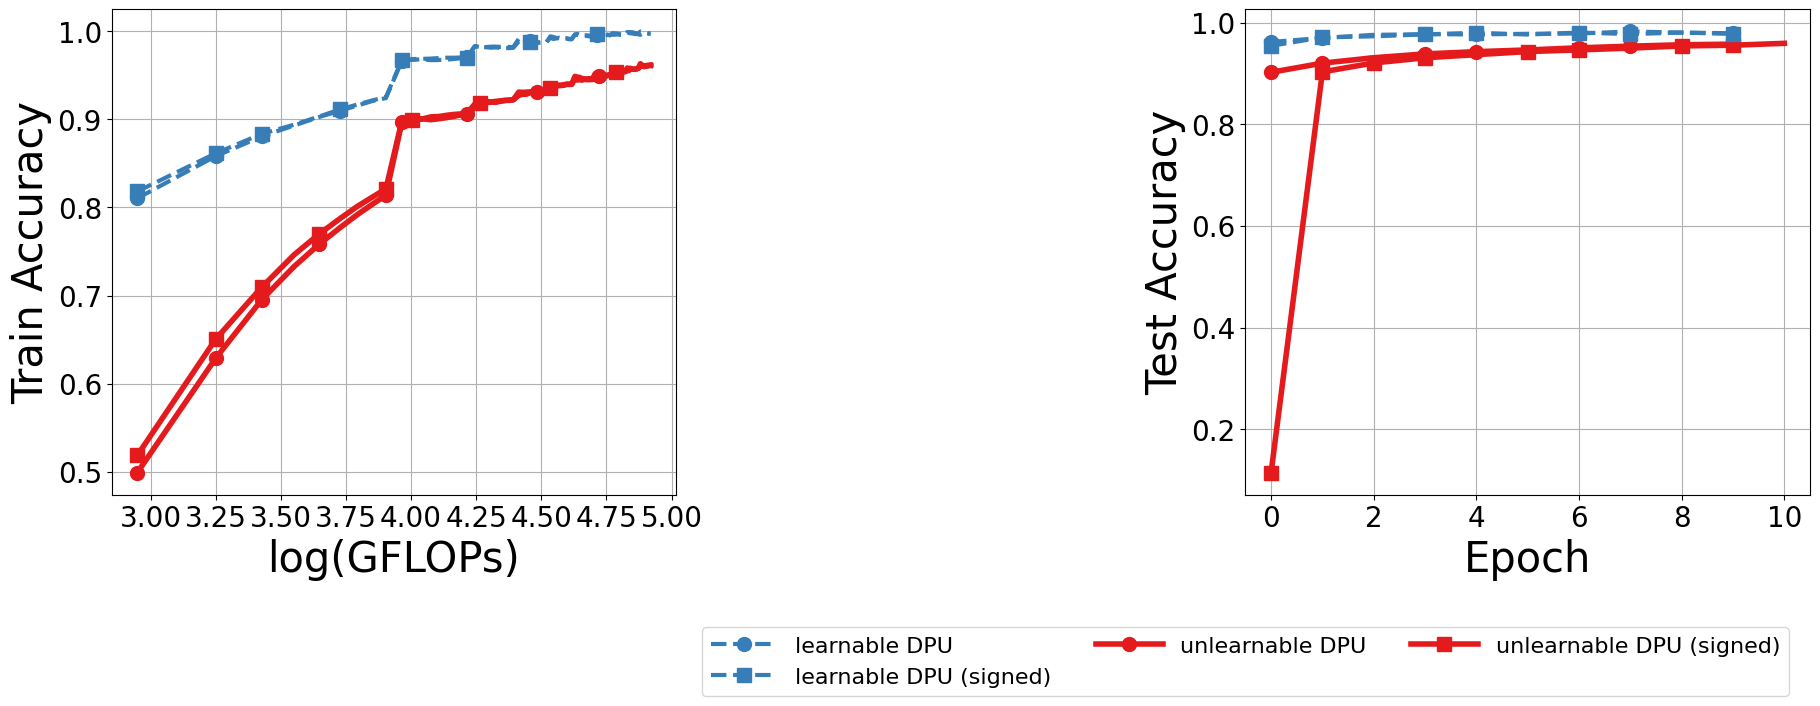

In [37]:
# File: plot_metrics.ipynb
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_results():
    # 定义实验分组和视觉参数
    EXPERIMENT_CONFIG = {
        "Static_BaseRNN": {
            "type": "unlearnable DPU",
            "color": 0,
            "learnable": False
        },
        "Hungarian_RandInit_DrosoRef": {
            "type": "learnable DPU",
            "color": 1,
            "learnable": True
        },
        "Drosophila_Metrics": {
            "type": "Visual input DPU",
            "color": 2,
            "learnable": True
        }
    }

    MARKER_STYLE = {
        'unsigned': 'o',  # 空心圆
        'signed': 's'     # 空心方
    }

    LINE_STYLE = {
        True: ('--', 3),  # 可学习：虚线
        False: ('-', 4)    # 不可学习：实线
    }

    COLOR_PALETTE = sns.color_palette('Set1', n_colors=3)

    # 加载数据
    results = {}
    for exp_name in EXPERIMENT_CONFIG:
        # 加载原始版本
        try:
            results[exp_name] = pickle.load(open(f"{exp_name}.pkl", "rb"))
        except FileNotFoundError:
            print(f"Warning: {exp_name}.pkl not found")
      
        # 加载signed版本
        try:
            results[f"{exp_name}_signed"] = pickle.load(open(f"{exp_name}.signed.pkl", "rb"))
        except FileNotFoundError:
            print(f"Warning: {exp_name}.signed.pkl not found")

    # 创建画布
    plt.figure(figsize=(18, 7))

    # ================== FLOPs效率图 ==================
    plt.subplot(1, 2, 1)
    for exp_name in EXPERIMENT_CONFIG:
        cfg = EXPERIMENT_CONFIG[exp_name]
      
        # 绘制两个版本
        for suffix in ['', '_signed']:
            full_name = f"{exp_name}{suffix}"
            if full_name not in results:
                continue

            # 获取视觉参数
            color = COLOR_PALETTE[cfg['color']]
            linestyle, lw = LINE_STYLE[cfg['learnable']]
            marker = MARKER_STYLE['signed' if suffix else 'unsigned']
          
            # 处理数据
            flops = [x[0]/1e9 for x in results[full_name]['flops_acc']]
            acc = [x[1] for x in results[full_name]['flops_acc']]
          
            # 绘制曲线
            plt.plot(np.log10(flops), acc,
                     linestyle=linestyle,
                     lw=lw,
                     color=color,
                     marker=marker,
                     markersize=10,
                     markevery=0.1,
                     label=f"{cfg['type']}{' (signed)' if suffix else ''}")

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("log(GFLOPs)", fontsize=30)
    plt.ylabel("Train Accuracy", fontsize=30)
    plt.grid(True)

    # ================== 测试准确率曲线 ==================
    plt.subplot(1, 2, 2)
    for exp_name in EXPERIMENT_CONFIG:
        cfg = EXPERIMENT_CONFIG[exp_name]
      
        for suffix in ['', '_signed']:
            full_name = f"{exp_name}{suffix}"
            if full_name not in results:
                continue

            # 获取视觉参数
            color = COLOR_PALETTE[cfg['color']]
            linestyle, lw = LINE_STYLE[cfg['learnable']]
            marker = MARKER_STYLE['signed' if suffix else 'unsigned']
          
            # 处理数据
            epoch_acc = results[full_name]['epoch_test_acc']
            epochs = range(len(epoch_acc))
          
            # 绘制曲线
            plt.plot(epochs, epoch_acc,
                     linestyle=linestyle,
                     lw=lw,
                     color=color,
                     marker=marker,
                     markersize=10,
                     markevery=0.1,
                     label=f"{cfg['type']}{' (signed)' if suffix else ''}")

    plt.xlabel("Epoch", fontsize=30)
    plt.ylabel("Test Accuracy", fontsize=30)
    plt.grid(True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # 手动指定图例顺序
    legend_order = [
        'learnable DPU',
        'learnable DPU (signed)',
        'unlearnable DPU',
        'unlearnable DPU (signed)',
        "Visual input DPU",
        "Visual input DPU (signed)"
    ]
  
    # 收集所有图例项并去重
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
  
    # 按指定顺序排列图例
    final_handles = [by_label[k] for k in legend_order if k in by_label]
  
    # 将图例放置在底部
    plt.legend(final_handles, legend_order,
               bbox_to_anchor=(0., -0.25),
               loc='upper center',
               ncol=3,
               fontsize=16,
               frameon=True,
               handlelength=3)

    # 调整布局
    plt.tight_layout(pad=.0)
    plt.savefig("dpu_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    plot_results()